In [1]:
from python_speech_features import mfcc, logfbank
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm
from sklearn.metrics import confusion_matrix
import itertools
import os

# how to download the data
# import kagglehub

# Download latest version
# path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")
# print("Path to dataset files:", path)

In [2]:
sampling_freq, audio = wavfile.read("genres/blues/blues.00000.wav")
mfcc_features = mfcc(audio, sampling_freq)
filterbank_features = logfbank(audio, sampling_freq)

In [3]:
print ('\nMFCC:\nNumber of windows =', mfcc_features.shape[0])
print ('Length of each feature =', mfcc_features.shape[1])
print ('\nFilter bank:\nNumber of windows =', filterbank_features.shape[0])
print ('Length of each feature =', filterbank_features.shape[1])


MFCC:
Number of windows = 2994
Length of each feature = 13

Filter bank:
Number of windows = 2994
Length of each feature = 26


10
genres/blues/blues.00093.wav 2994
genres/classical/classical.00079.wav 2994
genres/jazz/jazz.00016.wav 2994
genres/country/country.00088.wav 2994
genres/pop/pop.00027.wav 2992
genres/rock/rock.00011.wav 2994
genres/metal/metal.00022.wav 2992
genres/disco/disco.00052.wav 2992
genres/hiphop/hiphop.00022.wav 2994
genres/reggae/reggae.00080.wav 2992


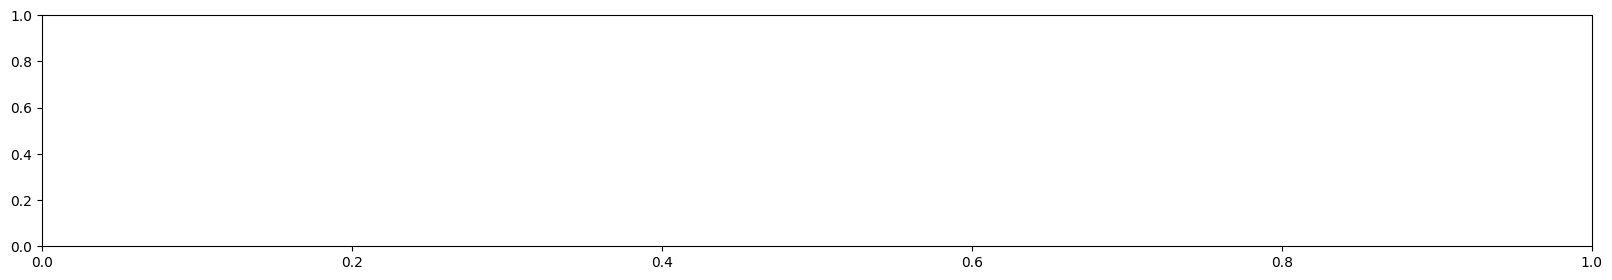

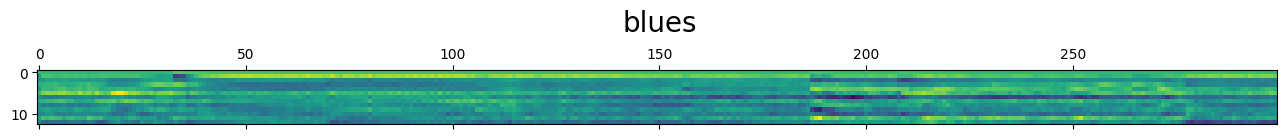

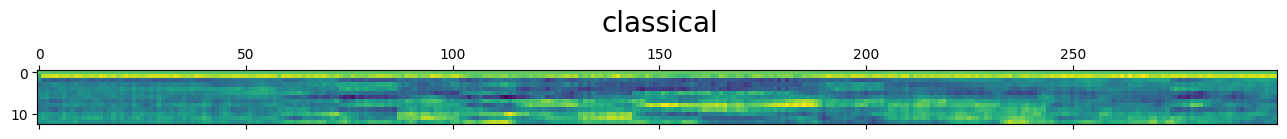

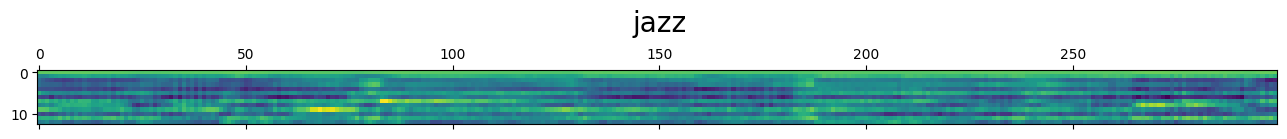

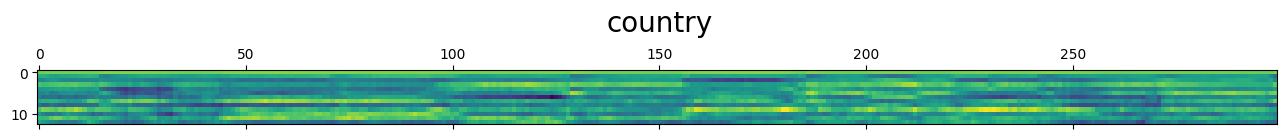

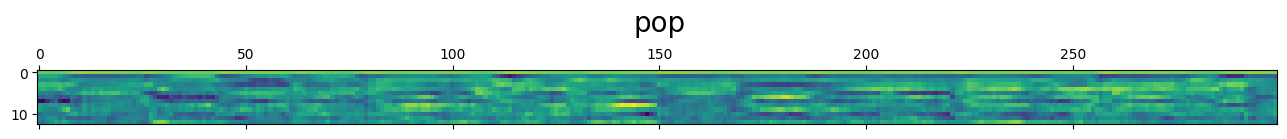

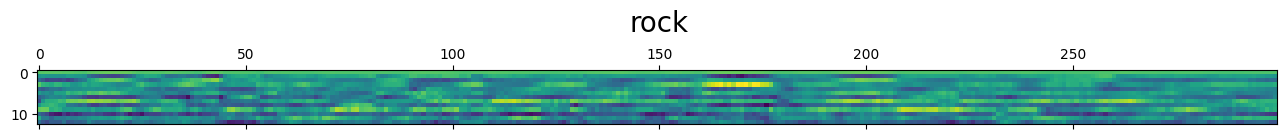

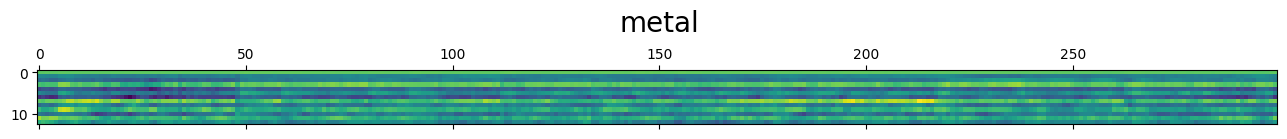

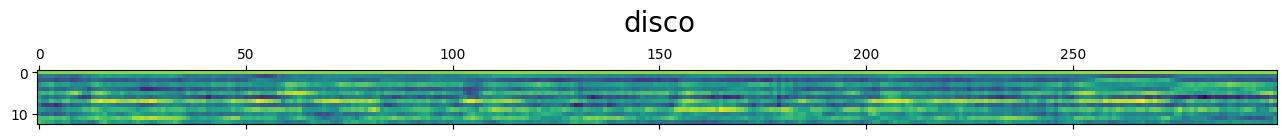

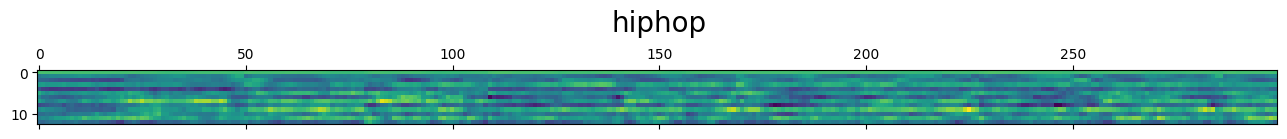

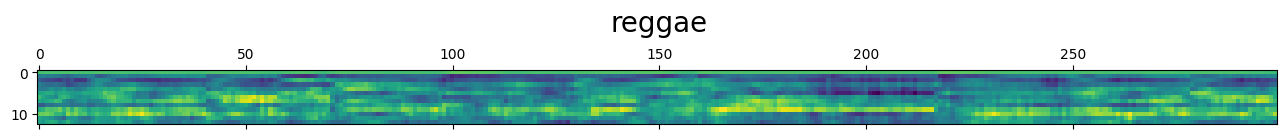

In [4]:
import glob
import os.path as path
genre_list = ["blues","classical", "jazz", "country", "pop", "rock", "metal", "disco", "hiphop", "reggae"]
print(len(genre_list))
figure = plt.figure(figsize=(20,3))
for idx ,genre in enumerate(genre_list): 
   example_data_path = 'genres/' + genre
   file_paths = glob.glob(path.join(example_data_path, '*.wav'))
   sampling_freq, audio = wavfile.read(file_paths[0])
   mfcc_features = mfcc(audio, sampling_freq, nfft=1024)
   #print(mfcc_features)
   print(file_paths[0], mfcc_features.shape[0])
   plt.yscale('linear')
   plt.matshow((mfcc_features.T)[:,:300])
   plt.text(150, -10, genre, horizontalalignment='center', fontsize=20)
 
plt.yscale('linear')
plt.show()

In [ ]:
from python_speech_features import mfcc
from scipy.io import wavfile
import numpy as np
import os
import glob
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Define your genres
genre_list = ["blues","classical", "jazz", "country", "pop", "rock", "metal", "disco", "hiphop", "reggae"]
data_dir = 'genres/'
X = []
y = []

# Step 1: extract features
for genre in genre_list:
    genre_path = os.path.join(data_dir, genre)
    file_paths = glob.glob(os.path.join(genre_path, "*.wav"))

    for file_path in file_paths:
        try:
            sampling_freq, audio = wavfile.read(file_path) # from scipy library: reads wav audio files, gets sampling frequency and audio signal array
            features = mfcc(audio, sampling_freq, nfft=1024) # mel frequency cepstral coefficients 
            
            # Step 2: aggregate features (e.g., mean across time axis)
            mean_features = np.mean(features, axis=0)
            
            X.append(mean_features)
            y.append(genre)
        except Exception as e:
            print(f"Error reading {file_path}: {e}")

# Step 3: train-test split
X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: train decision tree
clf = DecisionTreeClassifier(max_depth = 10)
clf.fit(X_train, y_train)

# Step 5: evaluate
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Error reading genres/jazz/jazz.00054.wav: File format b'\xcb\x15\x1e\x16' not understood. Only 'RIFF' and 'RIFX' supported.
Classification Report:
              precision    recall  f1-score   support

       blues       0.48      0.48      0.48        21
   classical       0.56      0.75      0.64        12
     country       0.43      0.43      0.43        23
       disco       0.35      0.42      0.38        19
      hiphop       0.42      0.36      0.39        22
        jazz       0.43      0.39      0.41        23
       metal       0.60      0.83      0.70        18
         pop       0.53      0.53      0.53        15
      reggae       0.14      0.15      0.15        20
        rock       0.44      0.26      0.33        27

    accuracy                           0.43       200
   macro avg       0.44      0.46      0.44       200
weighted avg       0.43      0.43      0.43       200

Confusion Matrix:
[[10  0  2  0  2  0  3  0  3  1]
 [ 0  9  0  0  0  1  0  0  0  2]
 [ 1  1 10

In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(accuracy_score(y_test, y_pred))

0.435


In [7]:
from sklearn.model_selection import cross_val_score

In [8]:
scores1 = cross_val_score(clf, X, y, cv=5)
scores1

array([0.335     , 0.41      , 0.385     , 0.505     , 0.38693467])

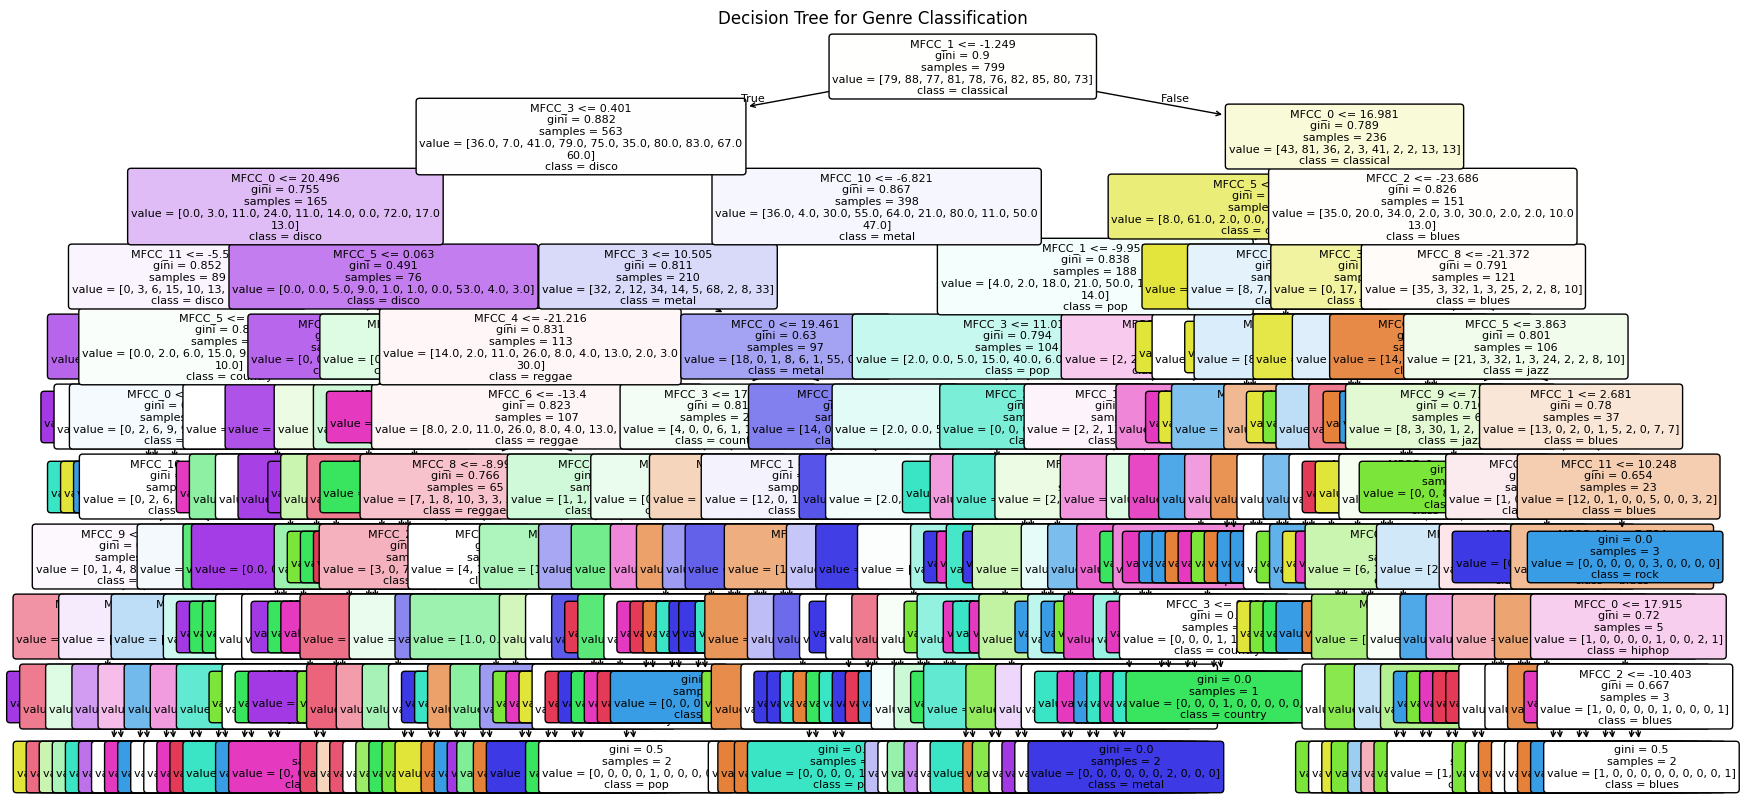

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))  # Adjust size depending on tree complexity
plot_tree(
    clf, 
    filled=True, 
    class_names=genre_list, 
    feature_names=[f"MFCC_{i}" for i in range(X.shape[1])],
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree for Genre Classification")
plt.show()

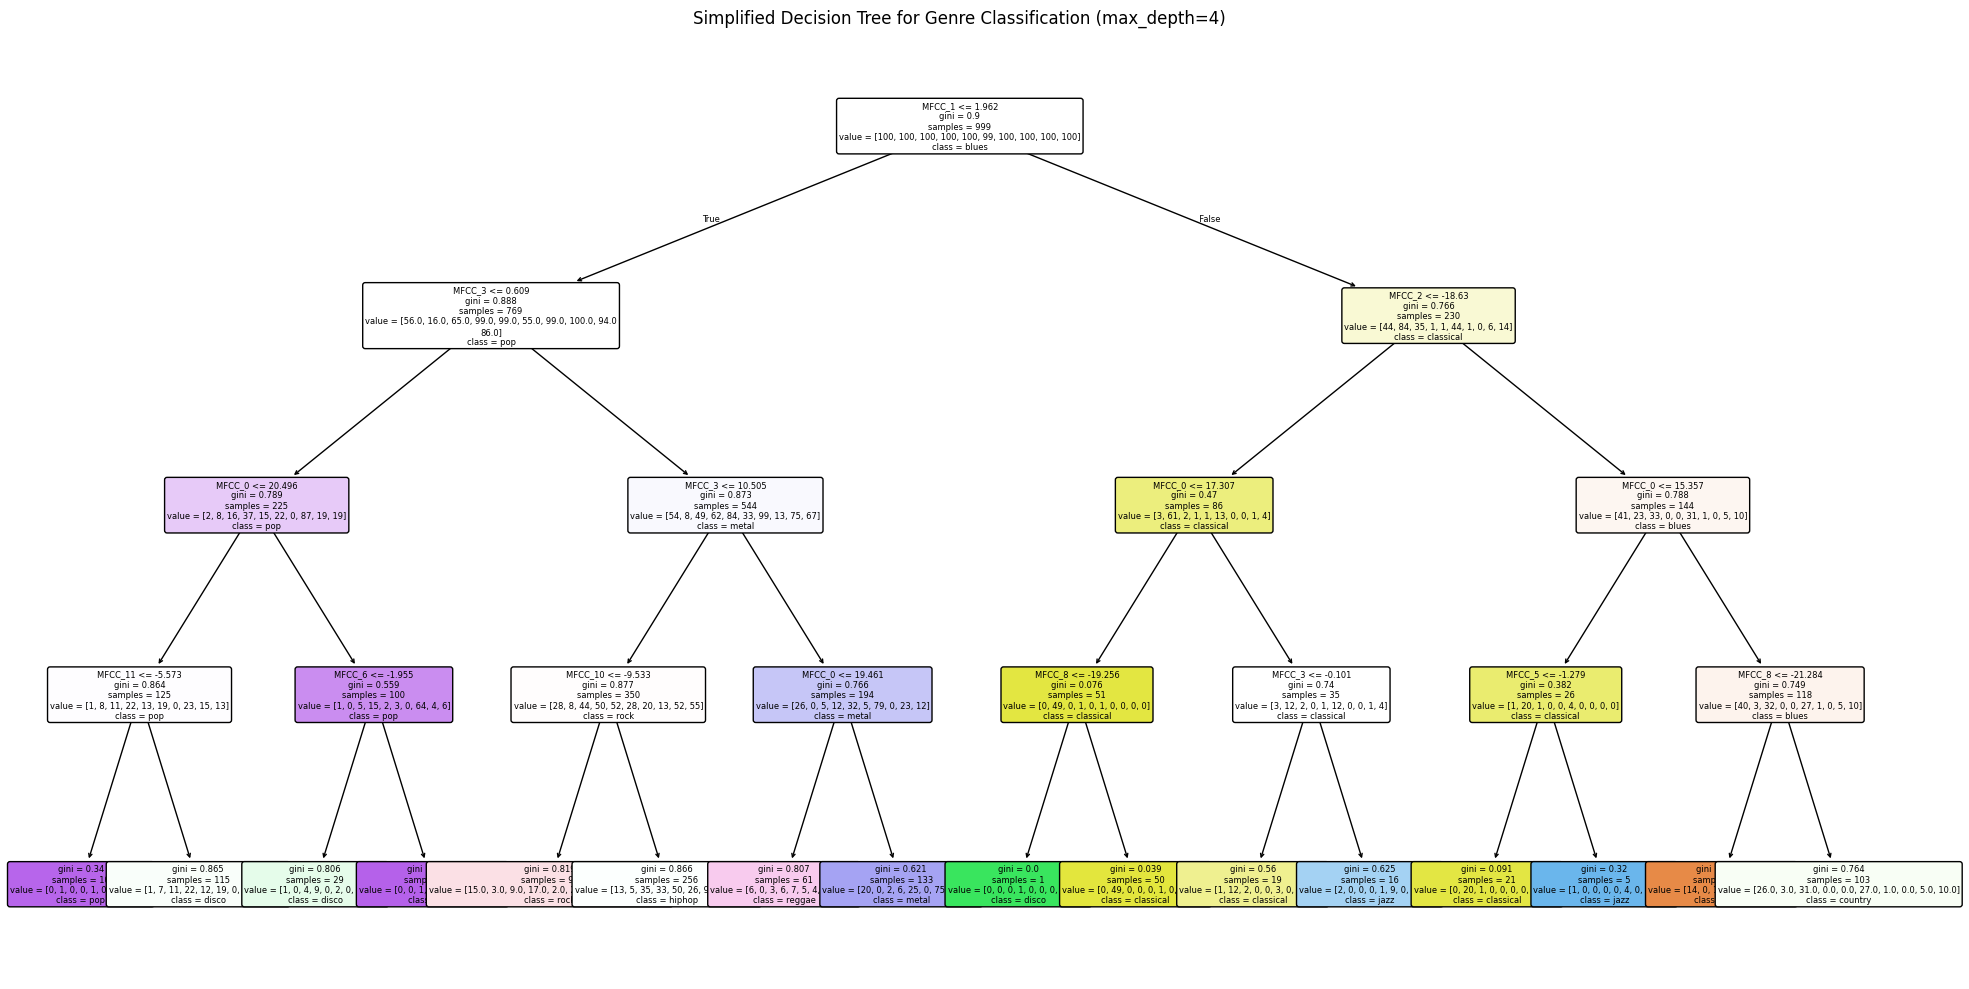

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import matplotlib.pyplot as plt
import graphviz

# Assuming you already have X (MFCC features) and y (genre labels)

# 1. Train a simplified decision tree
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X, y)

# 2. Visualize using matplotlib
plt.figure(figsize=(20, 10))
plot_tree(
    clf,
    feature_names=[f"MFCC_{i}" for i in range(X.shape[1])],
    class_names=clf.classes_.astype(str),
    filled=True,
    rounded=True,
    fontsize=6
)
plt.title("Simplified Decision Tree for Genre Classification (max_depth=4)")
plt.tight_layout()
plt.show()

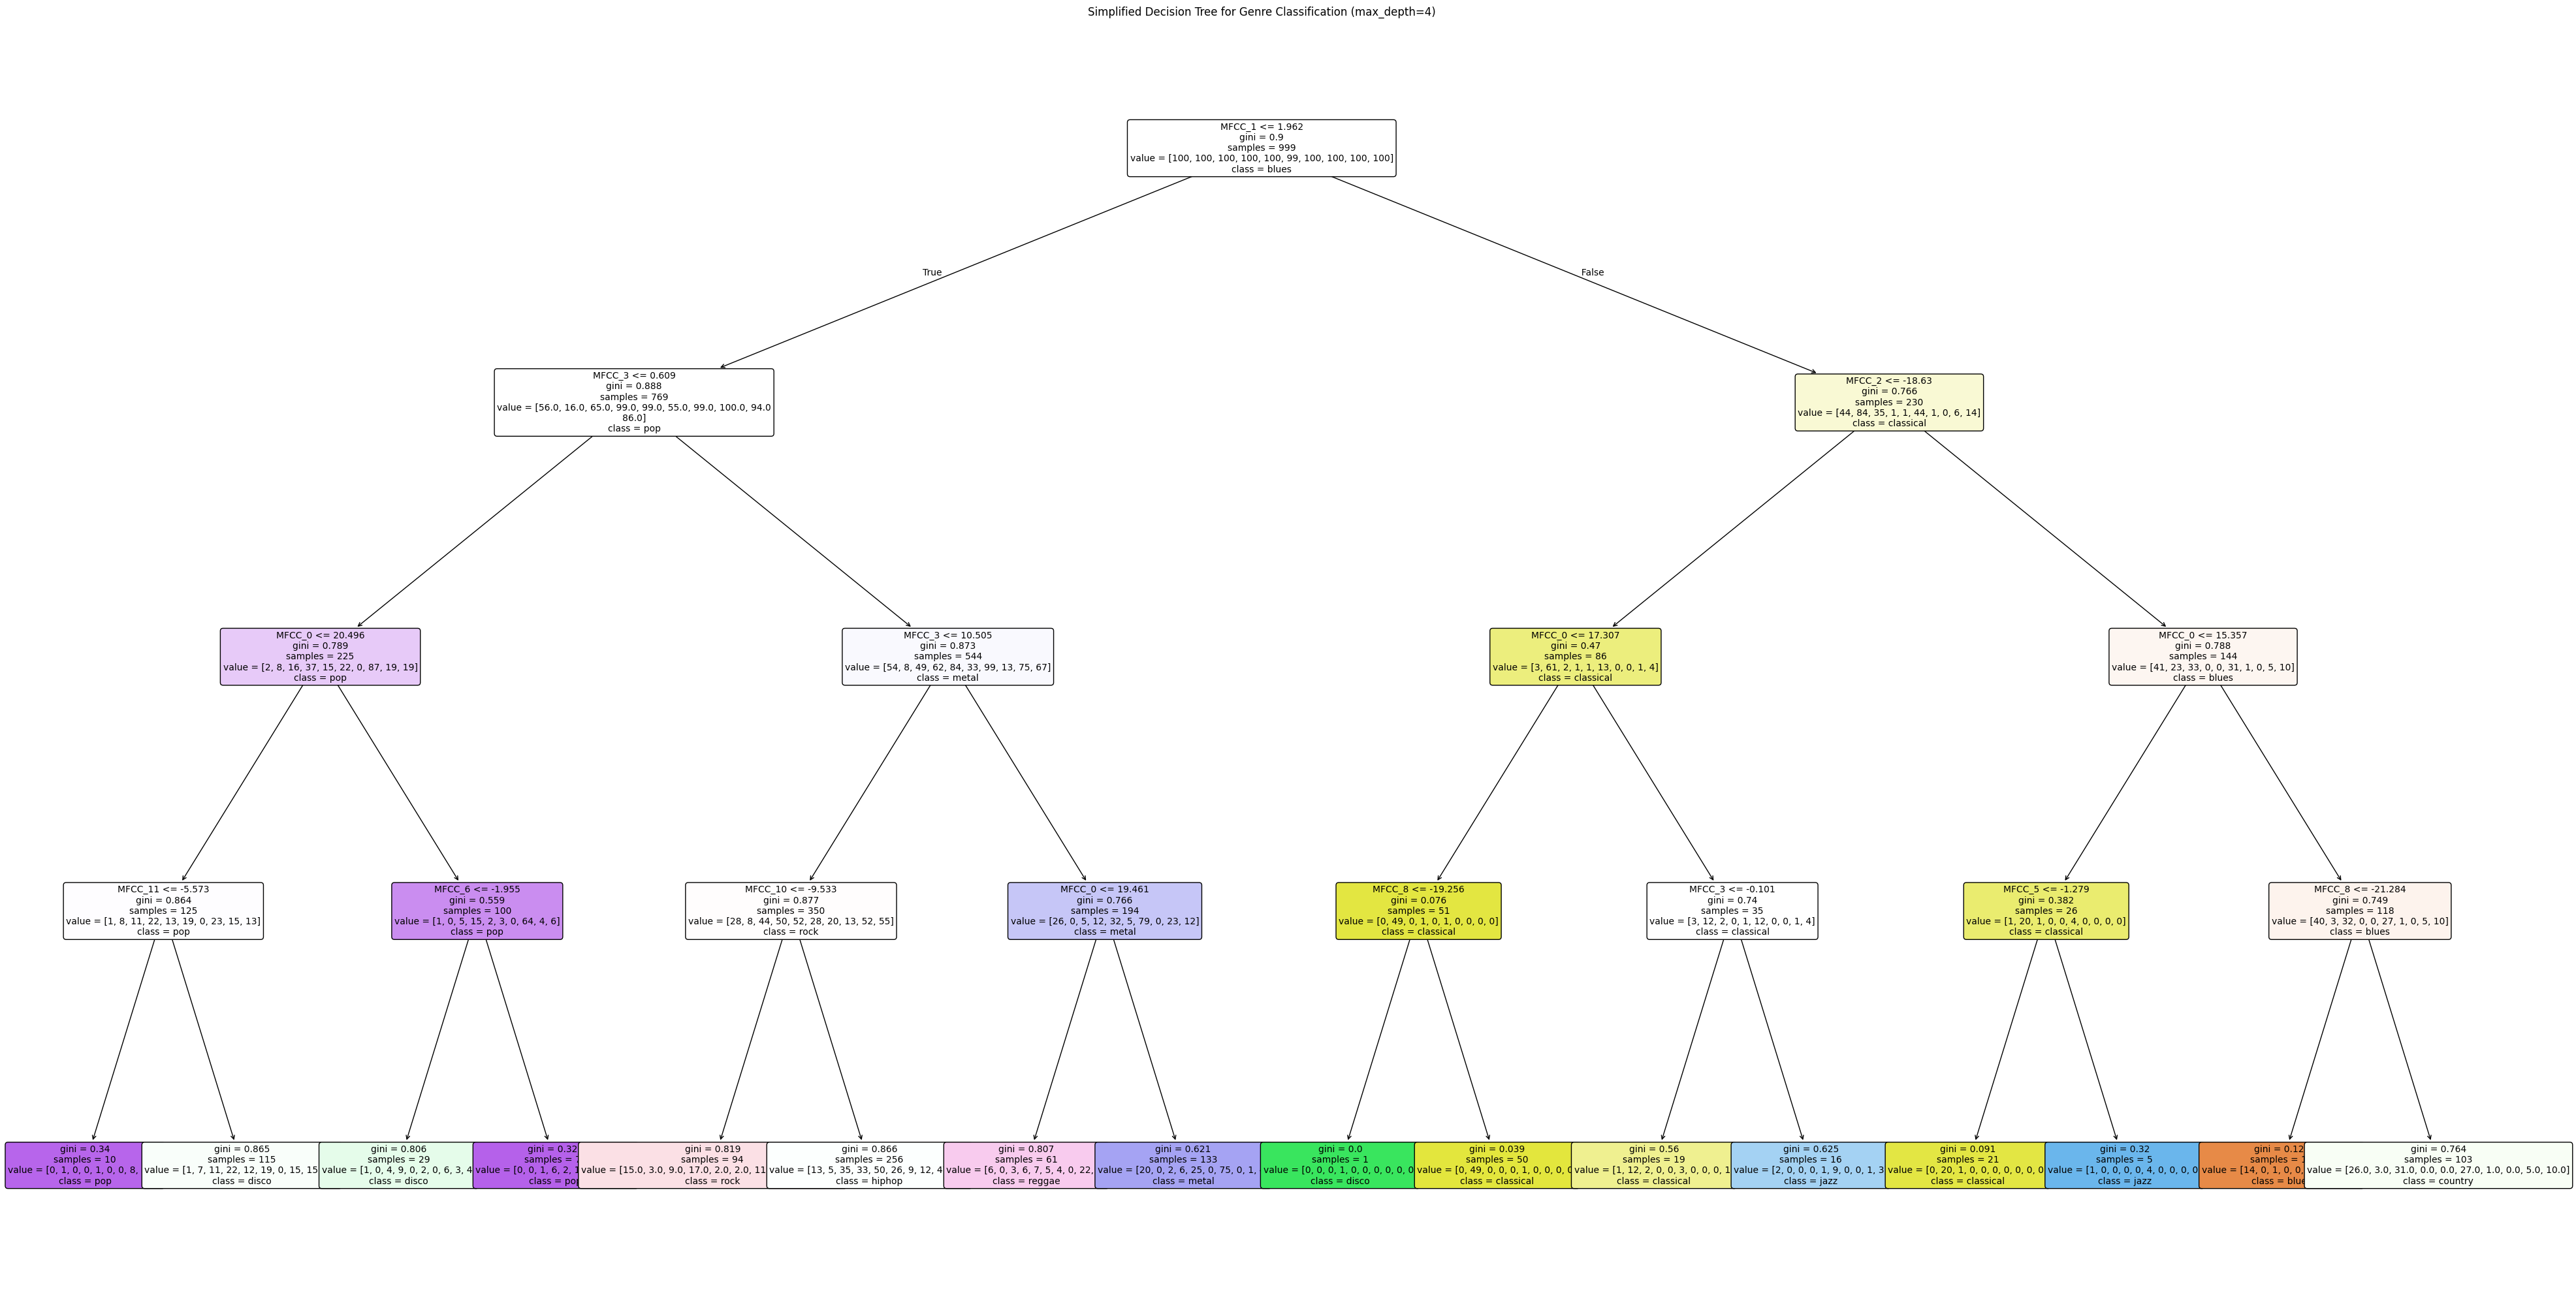

In [11]:
plt.figure(figsize=(40, 20))  # wider and taller
plot_tree(
    clf,
    feature_names=[f"MFCC_{i}" for i in range(X.shape[1])],
    class_names=clf.classes_.astype(str),
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Simplified Decision Tree for Genre Classification (max_depth=4)")
plt.tight_layout()
plt.show()


trying to refine model: adding std, max, min, etc.

In [12]:
from python_speech_features import mfcc
from scipy.io import wavfile
import numpy as np
import os
import glob
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Define your genres
genre_list = ["blues","classical", "jazz", "country", "pop", "rock", "metal", "disco", "hiphop", "reggae"]
data_dir = 'genres/'
X = []
y = []

# Step 1: extract features
for genre in genre_list:
    genre_path = os.path.join(data_dir, genre)
    file_paths = glob.glob(os.path.join(genre_path, "*.wav"))

    for file_path in file_paths:
        try:
            sampling_freq, audio = wavfile.read(file_path)

            # Extract MFCC features
            mfcc_features = mfcc(audio, sampling_freq, nfft=1024)

            # Compute mean and std across time axis (axis=0)
            mfcc_mean = np.mean(mfcc_features, axis=0)
            mfcc_std = np.std(mfcc_features, axis=0)

            # Combine into a single feature vector (length 26)
            features = np.concatenate([mfcc_mean, mfcc_std])

            # Append to dataset
            X.append(features)
            y.append(genre)
        except Exception as e:
            print(f"Error reading {file_path}: {e}")

# Step 3: train-test split
X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: train decision tree
clf = DecisionTreeClassifier(max_depth = 10)
clf.fit(X_train, y_train)

# Step 5: evaluate
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Error reading genres/jazz/jazz.00054.wav: File format b'\xcb\x15\x1e\x16' not understood. Only 'RIFF' and 'RIFX' supported.
Classification Report:
              precision    recall  f1-score   support

       blues       0.35      0.43      0.38        21
   classical       0.47      0.75      0.58        12
     country       0.38      0.43      0.41        23
       disco       0.24      0.26      0.25        19
      hiphop       0.41      0.41      0.41        22
        jazz       0.77      0.43      0.56        23
       metal       0.55      0.61      0.58        18
         pop       0.56      0.60      0.58        15
      reggae       0.42      0.55      0.48        20
        rock       0.09      0.04      0.05        27

    accuracy                           0.42       200
   macro avg       0.42      0.45      0.43       200
weighted avg       0.41      0.42      0.41       200

Confusion Matrix:
[[ 9  1  4  2  1  1  0  0  2  1]
 [ 0  9  1  0  0  1  0  0  0  1]
 [ 2  1 10

In [13]:
print(accuracy_score(y_test, y_pred))

0.42


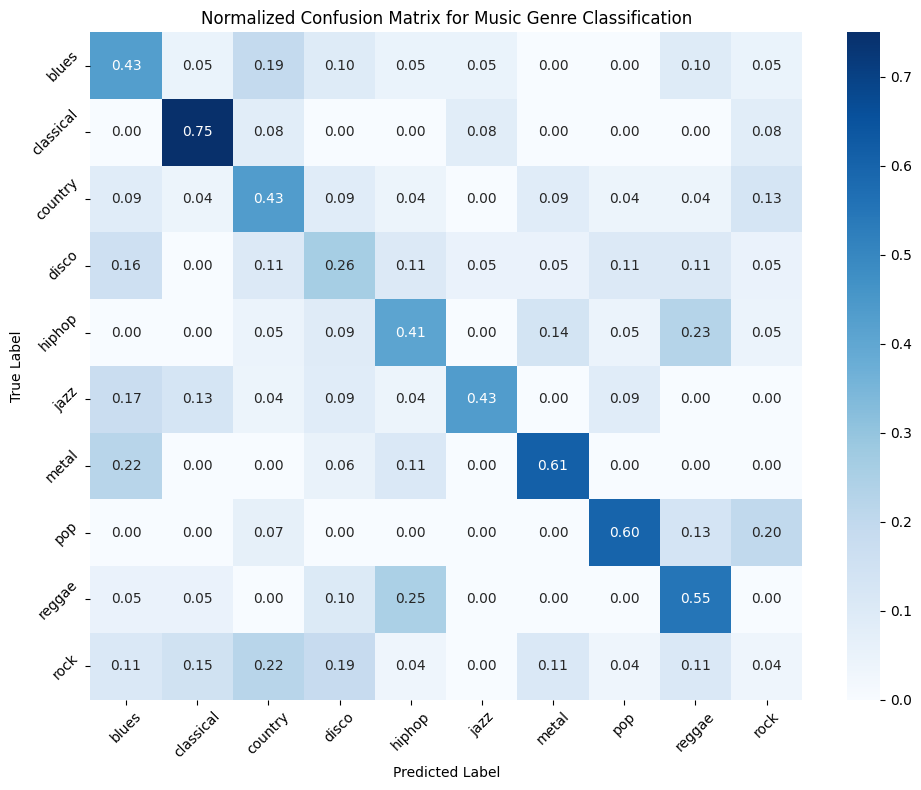

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Sort genres alphabetically
genre_labels = sorted(genre_list)

# Generate the confusion matrix with sorted labels
cm = confusion_matrix(y_test, y_pred, labels=genre_labels)

# Normalize by row (true labels)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=genre_labels, yticklabels=genre_labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix for Music Genre Classification')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()